## Visualizing linear relationships

`seaborn.lineplot()` 은 x 의 변화에 따른 y 값의 변화를 선으로 연결합니다. 이때 이용하는 `estimator` 의 기본 방식은 kernel density estimation 입니다. 다른 plotting 패키지와 비교하여 seaborn 의 장점 중 하나는 linear regression line 과 confidence interval 을 손쉽게 그려준다는 점입니다.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
tips = sns.load_dataset("tips")

import warnings
warnings.filterwarnings('ignore')

### Linear regression models

`regplot()` 은 하나의 그림을 그리는 함수이며, `lmplot()` 은 `row`, `col` 을 설정할 수 있는 multi plot 기능을 제공합니다. 그러므로 `regplot()` 의 return type 은 AxesSubplot 입니다.

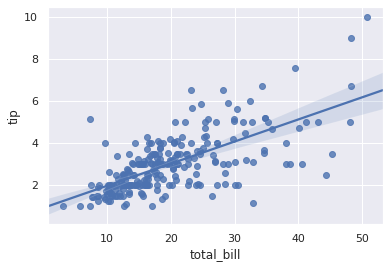

In [2]:
g = sns.regplot(x="total_bill", y="tip", data=tips)

반대로 `seaborn.lmplot()` 은 FacetGrid 를 return 합니다. 즉 `lmplot()` 이 상위 함수 입니다.

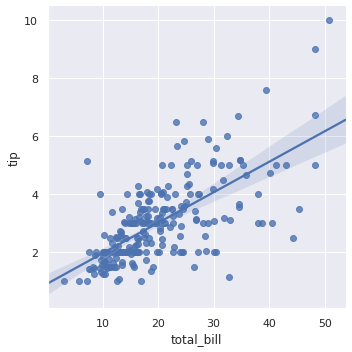

In [3]:
g = sns.lmplot(x="total_bill", y="tip", data=tips)

그러므로 `seaborn.lmplot()` 은 `col`, `row`, `aspect`, `hue`, `markers` 등등의 multi plot 을 그리는데 필요한 attributes 를 모두 이용할 수 있습니다. 또한 `ci=None` 으로 설정하면 confidence interval 도 그리지 않습니다.

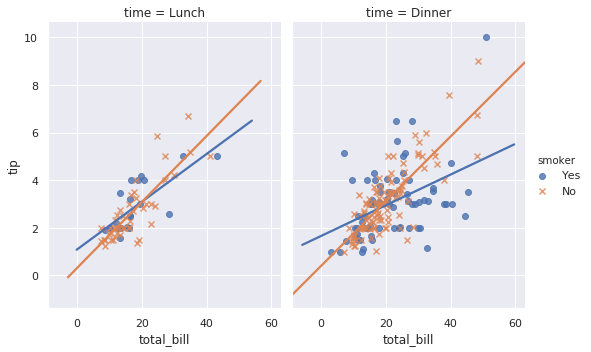

In [4]:
g = sns.lmplot(x="total_bill", y="tip", col="time", aspect=0.75,
    hue="smoker", markers=["o", "x"], ci=None, data=tips)

### Fitting different kinds of models

Linear regression 이기 때문에 다항 선형 회귀식도 지원 합니다. anscombe dataset 은 각각 1, 2 차식으로부터 생성된 데이터가 포함되어 있습니다.

In [5]:
anscombe = sns.load_dataset("anscombe")
anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


2차식으로부터 만들어진 데이터는 1차 선형 회귀 모델로 추정되기 어렵습니다.

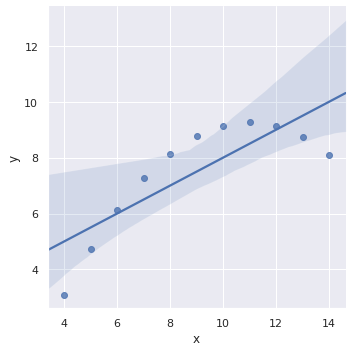

In [6]:
g = sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"))

`order=2` 로 변경하면 2차 다항 선형 회귀 방정식을 학습합니다. 그런데 2차 이상에서는 confidence interval 이 그려지지 않네요 (seaborn==0.9.0).

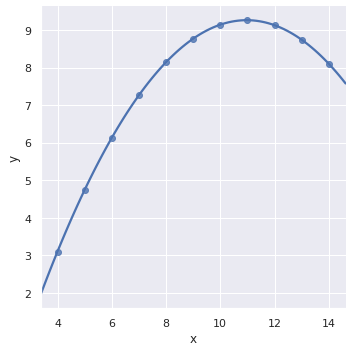

In [7]:
g = sns.lmplot(x="x", y="y", order=2, data=anscombe.query("dataset == 'II'"))

그 외에도 noise 를 제거하며 선형 회귀 모델을 학습하는 기능도 제공하지만, 이러한 과정은 seaborn 을 이용하는 것보다 외부에서 모델을 학습한 뒤 이를 plotting 하는 것이 더 적절합니다. 편리한 기능은 다항 선형 회귀식을 이용하는 것 까지라 생각합니다.

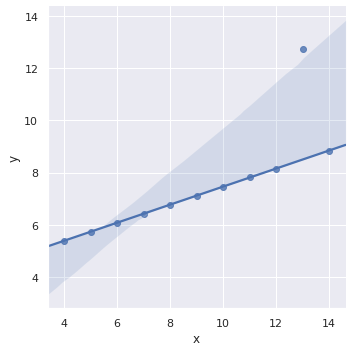

In [8]:
g = sns.lmplot(x="x", y="y", robust=True, data=anscombe.query("dataset == 'III'"))

### Regression with other plottings

그 외에도 `seaborn.jointplot()` 과 `seaborn.pairplot()` 역시 두 변수 간의 관계를 표현하는 plot 이기 때문에 `kind='reg'` 로 설정하면 회귀식이 함께 표현됩니다.

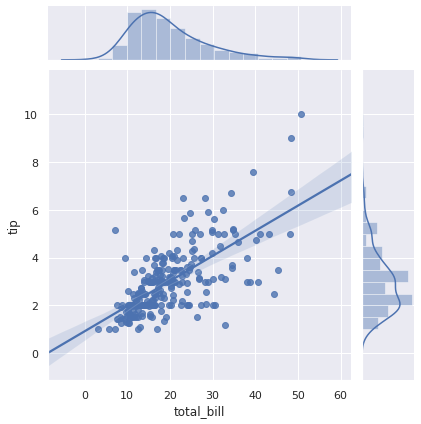

In [9]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

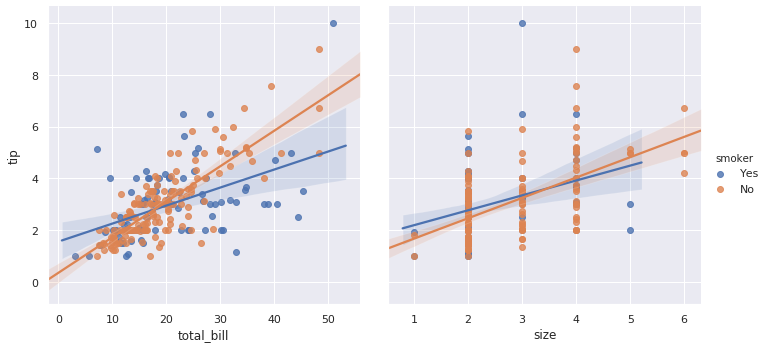

In [10]:
g = sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"], hue="smoker", height=5, kind="reg")

### Logistic regression

'tips' dataset 을 이용하여 로지스틱 회귀분석을 수행하기 위하여 데이터셋에 총 지출액 대비 15 % 이상의 팁을 준 경우를 'big_tip' 이라 명합니다. 'total_bill' 을 이용하여 big tip 인지 확인하는 로지스틱 회귀 모델을 학습하려면 `logistic=True` 로만 설정하면 됩니다. 

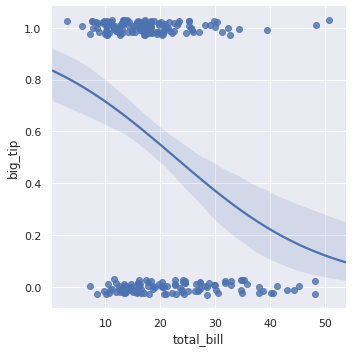

In [11]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
g = sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03)